<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/RMSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [115]:
california = fetch_california_housing()


df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target

df['locate'] = df['Latitude'] + df['Longitude']
mean_locate = df['locate'].mean()

df['locate'] = -abs(df['locate'] - mean_locate)

print(f"Max of 'locate': {df['locate'].max()}")
print(f"Min of 'locate': {df['locate'].min()}")


Max of 'locate': -0.002156976744174699
Min of 'locate': -5.647843023255831


In [116]:
cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'locate']

ln = len(cols)
data = {}
for i in range(ln):
    for j in range(i+1, ln+1):
        col = cols[i:j]
        X = df[col]
        y = df['PRICE']
        for x in range(2, 10):
            model = LinearRegression()
            kf = KFold(n_splits=x, shuffle=True, random_state=42)
            mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
            r2_scores = cross_val_score(model, X, y, scoring='r2', cv=kf)
            mse_mean = -mse_scores.mean()
            r2_mean = r2_scores.mean()
            data[mse_mean] = {'MSE': mse_mean, 'R2': r2_mean, 'Folds': x, 'cols': col}


fast_mse = min(data.keys())
re = data[fast_mse]
print(re)

{'MSE': 0.6161184291230183, 'R2': 0.5371708283894953, 'Folds': 6, 'cols': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'locate']}


In [117]:
columns = re['cols']
X = df[columns]
y = df['PRICE']

model = LinearRegression()
kf = KFold(n_splits=re['Folds'], shuffle=True, random_state=42)
mse_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=kf)

model.fit(X, y)


rmse = np.sqrt(mse_scores.mean())
print(f"RMSE: {rmse}")
print(f"MSE: {mse_scores.mean()}")
print(f"R2: {r2_scores.mean()}")

print(model.intercept_)
print(model.coef_)

RMSE: 0.78493211752547
MSE: 0.6161184291230183
R2: 0.5371708283894953
-0.35871007826846846
[ 5.28842637e-01  1.59314836e-02 -2.03026597e-01  9.74188563e-01
  1.73191902e-05 -4.76561641e-03  8.48918692e-02]


<Axes: ylabel='PRICE'>

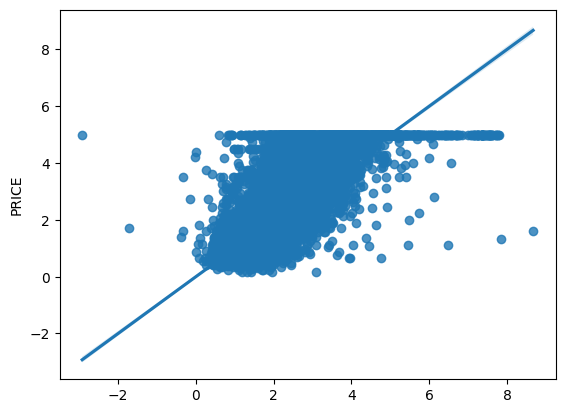

In [118]:
sns.regplot(x=model.predict(X), y=y)